<span style="color:#A00;font-weight:bold">Missing data: this notebook relies on calibration FITS files from Nickel. The files are not provided.</span>

## FITS basics

*Basic filesystem manipulation, reading in FITS files, selectors, image rendering, histograms*

**FITS (Flexible Image Transport System)** is a file format optimized for storing multidimensional data, such as image files. Since its first introduction in 1981, this format became the standard choice for storing astronomical data at laboratories all over the world. This notebook demonstrates how to read these files in and perform basic analysis, using the calibration data collected by the class as an example.

Apart from data, a FITS file usually contains an additional block of information in the *key:value* form known as **FITS headers**. The headers store some details about the image, such as its acquisition timestamp, the telescope used and its characteristics, filter chosen, exposure time and more. In advanced cases, the headers may contain parameters that allow special software to determine exactly which part of the sky was imaged, identify the objects visible and measure their brightness in absolute units. This notebook will use FITS headers to tell flat fields and bias frames apart.

The default setup of Python does not contain any utilities for manipulating FITS files. However, there exists an external module, **AstroPy**, that features the largest collection of currently existing Python routines for performing basic astronomical tasks, including FITS analysis. Before running this notebook, install **AstroPy** by running the following command (on Windows, use the Anaconda prompt available in the Start Menu; on Mac OS and Linux the usual terminal will do):

```
pip install astropy
```

**pip** is a package manager for Python. I.e., it is a program that can install / remove or update external Python modules. **pip** is shipped with most Python distributions, including Anaconda. Above, we tell **pip** to install **AstroPy** for us. The installation may take a while. Pay attention to the output of the command to make sure **AstroPy** installs without errors. **pip** will not install an already existing module twice, so the above command can be safely ran when you are not sure whether **AstroPy** is installed or not.

Remember that you need to press `SHIFT+ENTER` to run a cell.

In [1]:
# We will need NumPy and MatPlotLib for arrays and plots
import numpy as np
import matplotlib.pyplot as plt

# Here we load a submodule from AstroPy for manipulating FITS
from astropy.io import fits

# We will also need the OS module (default, no installation needed)
# to manipulate the files on your hard drive
import os

# This is a notebook setting to show MatPlotLib plots within the notebook
# and not in separate windows
%matplotlib inline

First and foremost, we need to tell Python where our data files are saved. This is where the **os** module comes in. It has a special function that returns a list of every file in a given directory.

In [3]:
data_dir = '../../FITS/data-2019-01-11/'      # Change this to YOUR data directory
                                              # The trailing slash is important!
                                              # Use forward slashes (/) to ensure
                                              # compatiblity with *nix and Windows
data_files = os.listdir(data_dir)

print data_files

['d100.fits', 'd101.fits', 'd102.fits', 'd103.fits', 'd104.fits', 'd105.fits', 'd106.fits', 'd107.fits', 'd108.fits', 'd109.fits', 'd110.fits', 'd111.fits', 'd112.fits', 'd113.fits', 'd114.fits', 'd115.fits', 'd116.fits', 'd117.fits', 'd118.fits', 'd119.fits', 'd120.fits', 'd121.fits', 'd122.fits', 'd123.fits', 'd124.fits', 'd125.fits', 'd126.fits', 'd127.fits', 'd128.fits', 'd200.fits', 'd201.fits', 'd202.fits', 'd203.fits', 'd204.fits', 'd205.fits', 'd206.fits', 'd207.fits', 'd208.fits', 'd209.fits', 'd210.fits', 'd211.fits', 'd212.fits', 'd213.fits', 'd214.fits', 'd215.fits', 'd216.fits', 'd217.fits', 'd218.fits', 'd219.fits', 'd220.fits', 'd221.fits', 'd222.fits', 'd223.fits', 'd224.fits', 'd225.fits']


Some of those FITS files will be dark frames and others will be flat fields. We need to subtract bias frames from flat fields before any further analysis can be done. The frame type will be stored in FITS headers, so let's take the first FITS file out of the stack and try to retrieve this information.

In [4]:
my_fits = data_files[0]                   # Take the first image
h = fits.open(data_dir + my_fits)         # Open the file using AstroPy's fits.open()

# "h" will store the so-called handler of the file. It is a special object, whose functions
# can be used to manipulate the file and whose properties will link to the data stored in the file.

header = h[0].header                      # Get the headers
h.close()                                 # Close the file, allowing other processes to use it.

Note that instead of typing `h.header`, I used `h[0].header`. This is because FITS files can contain multiple images (in this case, they do not), so we need to tell AstroPy to access the first one.

Now that we have the headers, let's have a look inside. The `.keys()` method of the `header` object will return every header there is...

In [5]:
print header.keys()
print "---"        # Aesthetics

# This is how you access individual headers
print "DATE = ", header["DATE"]             # Timestamp
print "EXPTIME = ", header["EXPTIME"]       # Exposure

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'CRVAL1U', 'CRVAL2U', 'CDELT1U', 'CDELT2U', 'OBSNUM', 'IDNUM', 'UGEOM', 'DGEOM', 'AMPSROW', 'AMPSCOL', 'OBSTYPE', 'EXPTIME', 'BSCALE', 'BZERO', 'COMMENT', 'PROGRAM', 'VERSION', 'TSEC', 'TUSEC', 'DATE', 'DATASEC', 'COMMENT', 'COMMENT', 'CSYER2', 'CSYER1', 'CRDER2', 'CRDER1', 'CD2_2', 'CD2_1', 'CD1_2', 'CD1_1', 'CRVAL2', 'CRVAL1', 'CRPIX2', 'CRPIX1', 'CUNIT2', 'CUNIT1', 'EQUINOX', 'RADECSYS', 'CNAME2', 'CNAME1', 'CTYPE2', 'CTYPE1', 'WCSNAME', 'CRVAL2C', 'CRVAL1C', 'CRVAL2S', 'CRVAL1S', 'CSYER2C', 'CSYER1C', 'CRDER2C', 'CRDER1C', 'CD2_2C', 'CD2_1C', 'CD1_2C', 'CD1_1C', 'CRPIX2C', 'CRPIX1C', 'CUNIT2C', 'CUNIT1C', 'CNAME2C', 'CNAME1C', 'CTYPE2C', 'CTYPE1C', 'WCSNAMEC', 'CSYER2S', 'CSYER1S', 'CRDER2S', 'CRDER1S', 'CD2_2S', 'CD2_1S', 'CD1_2S', 'CD1_1S', 'CRPIX2S', 'CRPIX1S', 'CUNIT2S', 'CUNIT1S', 'EQUINOXS', 'RADESYSS', 'CNAME2S', 'CNAME1S', 'CTYPE2S', 'CTYPE1S', 'WCSNAMES', 'AIRMASS', 'OWNRNOTE', 'OWNRHINT', 'HA', 'DEC', 'RA', 'OBSERVER', 'AP

This is a lot of information. Feel free to explore! We are interested in whether this FITS is a bias or a flat. This will be stored in the `"OBJECT"` header.

In [6]:
print header["OBJECT"]

bias


Now onto something more challenging. I will define a function that extracts the `"OBJECT"` header from a given FITS file. Then, I will run this function in a loop on every FITS file we have.

In [7]:
biases = []      # This is an empty list so far. We will put all bias frames here
flats  = []      # ...and all flat fields here

def get_frame_type(filename):
    """Extract the OBJECT header of the FITS file in `filename`"""
    h = fits.open(filename)
    result = h[0].header["OBJECT"]
    h.close()
    return result

for data_file in data_files:
    fits_type = get_frame_type(data_dir + data_file)
    if fits_type == 'bias':
        biases += [data_file]                          # Remember, we can concatenate lists
    elif fits_type == 'flats' or fits_type == 'flat':
        flats  += [data_file]
    else:
        print 'UNRECOGNIZED FRAME TYPE:', fits_type

print "BIAS:", biases
print "FLAT:", flats

BIAS: ['d100.fits', 'd101.fits', 'd102.fits', 'd103.fits', 'd104.fits', 'd200.fits', 'd201.fits', 'd202.fits', 'd203.fits']
FLAT: ['d105.fits', 'd106.fits', 'd107.fits', 'd108.fits', 'd109.fits', 'd110.fits', 'd111.fits', 'd112.fits', 'd113.fits', 'd114.fits', 'd115.fits', 'd116.fits', 'd117.fits', 'd118.fits', 'd119.fits', 'd120.fits', 'd121.fits', 'd122.fits', 'd123.fits', 'd124.fits', 'd125.fits', 'd126.fits', 'd127.fits', 'd128.fits', 'd204.fits', 'd205.fits', 'd206.fits', 'd207.fits', 'd208.fits', 'd209.fits', 'd210.fits', 'd211.fits', 'd212.fits', 'd213.fits', 'd214.fits', 'd215.fits', 'd216.fits', 'd217.fits', 'd218.fits', 'd219.fits', 'd220.fits', 'd221.fits', 'd222.fits', 'd223.fits', 'd224.fits', 'd225.fits']


Note that the code will print a warning whenever it encounters a frame type that is neither flat nor bias. In this case, we should not have any, but it is always a good idea to make your code scalable to future applications. In the very least, you should check whether your code is adequate for the data provided and warn the user if it is not.

It appears that flat fields can be denoted with both `'flat'` and `'flats'`, which is why I had to use the `or` statement. In fact, I did not originally know that this was the case and was only checking for `'flat'`. This made my code throw a bunch of "Unrecognized frame type" warnings, which led me to a suitable fix.

Now we have two lists: one containing every bias frame and one containing every flat frame. In this notebook, I will only take the first file from each list and analyze them.

Let's try extracting the actual data from the first bias frame.

In [9]:
my_bias = biases[0]
h = fits.open(data_dir + my_bias)
data = h[0].data * 1.0           # Force typecase everything to float by multiplying with 1.0
h.close()

print data

[[927. 914. 927. ... 915. 921. 914.]
 [922. 924. 921. ... 916. 909. 921.]
 [922. 923. 924. ... 916. 919. 911.]
 ...
 [922. 929. 926. ... 922. 915. 921.]
 [924. 922. 934. ... 916. 916. 923.]
 [920. 925. 926. ... 921. 917. 920.]]


`data` is a NumPy array. Unlike the arrays we considered before, this one has two dimensions. This means that accessing a specific element will require two indices, as illustrated in the cell below. Each element contains the number of counts (or ADUs, for "analog-to-digital units") stored in every pixel of the image.

In [10]:
print data[5,7]                 # Access a specific pixel, X = 5, Y = 7 (counting from zero)
print np.shape(data)            # np.shape() returns the size of the image
print np.shape(data)[0]         # The first element contains the height
print np.shape(data)[1]         # The second element contains the width
print np.sum(data) / (np.shape(data)[0] * np.shape(data)[1]) # Average count
print np.min(data), np.max(data)  # Max and min counts

930.0
(1024L, 1056L)
1024
1056
986.0557916814631
869.0 65535.0


MatPlotLib - the plotting module - has functions that can display this frame on the screen as well as its histogram of counts. Let's start with the former. The function we need is `plt.imshow()`. Its first argument is the data to be plotted, which is expected to be a 2D array. We will also need to specify the floor and the ceiling counts (`min = ...` and `max = ...`). MatPlotLib will treat the floor count as the darkest and the ceiling count as the brightest. You can change the contrast of the image by altering those. For now, I will limit the data to $0.05\sigma$ around the mean value.

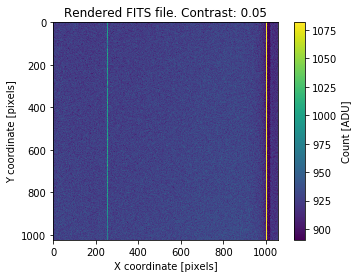

In [11]:
def render_my_data(data, contrast):
    """
       Renders a 2D image from input array with labels.
       Sets the floor and the ceiling of the vizualization
       as a fraction of the standard deviation away from the mean
       defined by 'contrast'.
    """
    total_pixels = np.shape(data)[0] * np.shape(data)[1]             # Total pixel count
    mean = np.sum(data) / total_pixels                               # Mean value
    std  = (np.sum(data ** 2.0) / total_pixels - mean ** 2.0) ** 0.5 # Standard deviation


    # std *= ((total_pixels) / (total_pixels - 1.0)) ** 0.5          # Bessel correction
    # (we do not need this correction here. Why?)

    plt.imshow(data, vmin = mean - contrast * std, vmax = mean + contrast * std)
    
    # Now onto some labeling
    plt.xlabel('X coordinate [pixels]')                              # Axis label
    plt.ylabel('Y coordinate [pixels]')
    plt.title('Rendered FITS file. Contrast: ' + str(contrast))      # Title
    plt.colorbar().set_label('Count [ADU]')                          # Colorbar

render_my_data(data, 0.05)    # Try changing the contrast!

Sometimes, instead of rendering the entire image, we may be interested in a subframe, bounded by certain coordinate values. This can be achieved using a mechanism, native to Python, known as *array slicing*. Have a look at the cell below to get a taste for it!

In [12]:
my_list = ['a', 'b', 'c', 'd', 'e', 'f']                  # Create some test list
print my_list[2]                                          # Access a specific element
print my_list[2:4]                                        # Extract elements from second
                                                          # (inclusive) to fourth (exclusive)
print my_list[:4]                                         # Extract elements from start
                                                          # up to fourth (exclusive)
print my_list[4:]                                         # Extract elements from fourth
                                                          # (inclusive) and until end

print my_list[0:6:2]                                      # Extract every second element from
                                                          # zeroth to sixth
print my_list[::2]                                        # Extract every second element from
                                                          # start to end

c
['c', 'd']
['a', 'b', 'c', 'd']
['e', 'f']
['a', 'c', 'e']
['a', 'c', 'e']


Now let's use array slicing to render a subframe, bounded by $500\leq;x<600$ and $500\leq;y<600$.

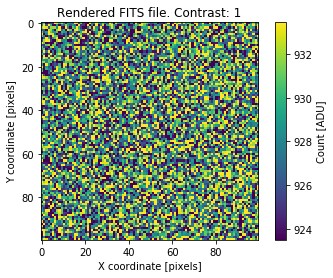

In [13]:
render_my_data(data[500:600,500:600], 1)

MatPlotLib can also plot a histogram of the data, using `plt.hist()`. The cell below does so for the same subframe as before ($500\leq;x<600$ and $500\leq;y<600$). A few aspects of the code below must be noted:

* Histograms are plotted for 1D data! They show the frequency of occurrence of values. An attempt to plot a 2D array will cause MatPlotLib to render a series of histograms instead of just one. Hence, prior to plotting the histogram, one needs to *flatten* the array. Flattening stacks every row of pixels one after another, creating a (very long) 1D sequence! NumPy can flatten arrays for you with `np.ndarray.flatten()`.
* For continuous (real or float) values, the frequency of occurrence of each will always be $1$, because the probability of drawing two floats identical in every significant figure from the parent population is negligible. This is why, instead of plotting the frequencies as such, we need to *bin* the data first (i.e., define intervals, within which multiple values contribute to the same frequency count). `plt.hist()` can arrange your data in bins for you with the `bins` argument. Below, I create $50$ bins. A larger number of bins will make your histogram sharper at the expense of lower frequency precision per bin. Try changing the number of bins to see the effect yourself!

Text(0.5,1,'My histogram')

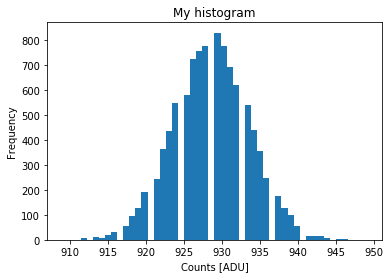

In [14]:
plt.hist(np.ndarray.flatten(data[500:600,500:600]), bins = 50)

# Labeling
plt.xlabel('Counts [ADU]')
plt.ylabel('Frequency')
plt.title('My histogram')

As convenient as it may be, `plt.hist()` is considered too high-level for this course and in your coding exercises you will be expected to implement your own routine using `plt.plot()` or `plt.step()`. A very basic example of this is provided below. Feel free to use it as your starting point. The cell below aims to produce the same histogram as the cell above without using `plt.hist()`.

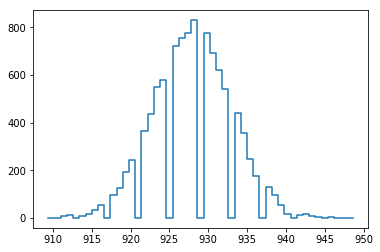

In [15]:
def my_hist(data, bins):
    """Plot a histogram of 1D data with a given number of bins"""
    # First, define the edges and centers of the bins
    bin_left_edges  = np.linspace(min(data), max(data), bins + 1)
    bin_left_edges = bin_left_edges[:-1]    # The last bin is not needed (why?)
    bin_width  = bin_left_edges[1] - bin_left_edges[0]
    bin_right_edges = bin_left_edges + bin_width
    bin_centres = (bin_left_edges + bin_right_edges) / 2.0
    
    # The frquencies will be stored here later. So far, create a blank array
    bin_values = np.zeros(bins)
    
    for i, bin_centre in enumerate(bin_centres):
        # Find all values that belong the this bin and count them
        condition = np.logical_and(data > bin_left_edges[i], data <= bin_right_edges[i])
        bin_values[i] = len(data[condition])
    
    plt.step(bin_centres, bin_values)   # Just like plt.plot(), but the plot looks like a staircase

my_hist(np.ndarray.flatten(data[500:600,500:600]), bins = 50)

As our final step, I will use this bias frame to correct the first flat field from the set (`flats[0]`).

Corrected mean (overall): 8.082020152698863
Corrected std  (overall): 217.47654787521782
Corrected mean (subfrm) : 5.3
Corrected std  (subfrm) : 7.191355922216617


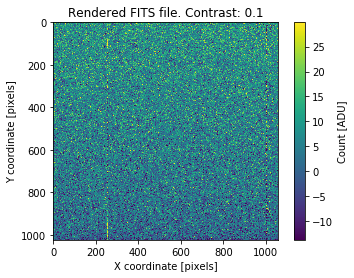

In [16]:
# Load the flat (this probably requires a function, since we are doing it multiple times!)
my_flat = flats[0]
h = fits.open(data_dir + my_flat)
flat_data = h[0].data
h.close()

# Correct the flat for bias
corrected_data = flat_data - data

# Render the corrected flat
render_my_data(corrected_data, 0.1)

# Get some statistics
print "Corrected mean (overall):", np.mean(corrected_data)
print "Corrected std  (overall):", np.std(corrected_data)
print "Corrected mean (subfrm) :", np.mean(corrected_data[500:600,500:600])
print "Corrected std  (subfrm) :", np.std(corrected_data[500:600,500:600])